# Mini Project 1 - Handwritten Digits Classifier

**Done by:** Navpreet Singh (ID) and Valeria Dolgaliova (40212218)

**Course:** COMP 472 – Artificial Intelligence

---

The following notebook shows a simple machine learning model that classifies handwritten digits (0–9) using the built-in digits dataset from `scikit-learn`. The model used is **Logistic Regression**, and the project showcases data exploration, training, prediction, and evaluation.

The project uses the following Python libraries:

- **NumPy** for numerical operations and array handling such as pixel normalization
- **Matplotlib** for visualizing prediction examples and plotting confusion matrix
- **Seaborn** to display the confusion matrix as a heatmap for better visuals
- **scikit-learn** for
   - Loading the digits dataset (`sklearn.datasets`)
   - Splitting the data (`train_test_split`)
   - Creating and training the model (`LogisticRegression`)
   - Evaluating the model (`classification_report`, `confusion_matrix`)

In [8]:
# Required libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

## Loading and exploring the dataset
The dataset contains 1797 grayscale images, each representing a digit from 0 to 9. Each image is 8×8 pixels and comes with a corresponding true label.

In [9]:
# Load digits dataset from sklearn
digits = load_digits()
data = digits.data / 16.0  # Normalize pixel values of flattened array (1797 x 64) to range 0–1
labels = digits.target    # Actual digit labels (0–9) for each image
images = digits.images    # Original 8x8 images for plots and visuals

print("Dataset summary:")
print(f"Image shape in pixels -> {images[0].shape}")
print(f"Total number of images in dataset -> {len(images)}")
print(f"All unique labels -> {np.unique(labels)}")

Dataset summary:
Image shape in pixels -> (8, 8)
Total number of images in dataset -> 1797
All unique labels -> [0 1 2 3 4 5 6 7 8 9]


## Splitting the data
We split the dataset into 2 subsets:

*   80% training data for learning
*   20% testing data to see how well the model generalizes



In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42
)

## Training the model
We use **Logistic Regression**, a baseline classification algorithm, to build the model using the training data.

In [11]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

## Making predictions on test data
The trained model is used to predict labels for the test data.

In [12]:
y_pred = model.predict(X_test)

## Evaluate the classifier's performance
The model is evaluated using:

*   A *classification report* which includes:
    - precision (of all predictions the model made for a digit, how many were correct?)
    - recall (of all actual images of a digit, how many did the model correctly identify?)
    - F1-score (balance between precision and recall)
    - support (How many actual samples of that digit were in the test set?) for each digit class.

*   A *confusion matrix* that shows which digits were classified correctly and which were misclassified.


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.96      0.96      0.96        28
           2       0.97      1.00      0.99        33
           3       1.00      0.97      0.99        34
           4       1.00      0.98      0.99        46
           5       0.91      0.91      0.91        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.90      0.95      0.93        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

Confusion Matrix:


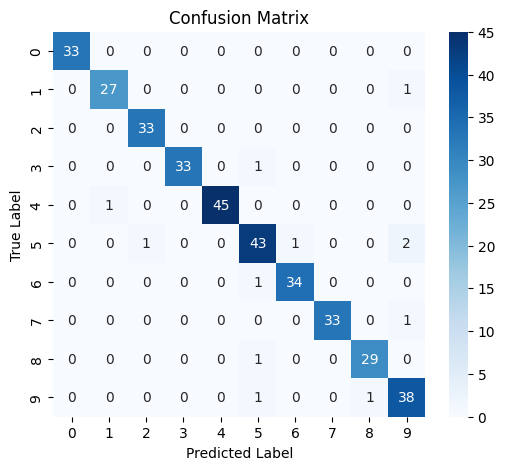

In [13]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Examples of predictions

Visualization of 3 test samples with their predicted and actual labels.

Displaying 5 prediction samples:


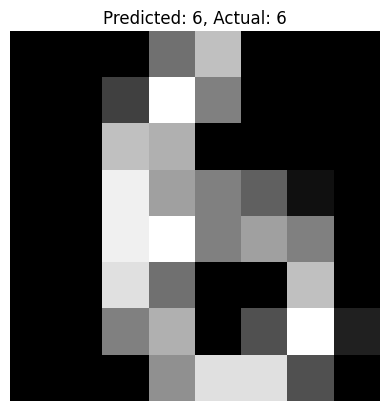

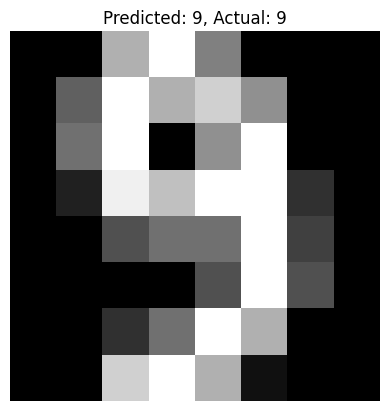

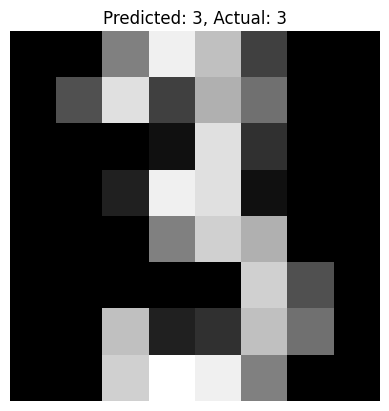

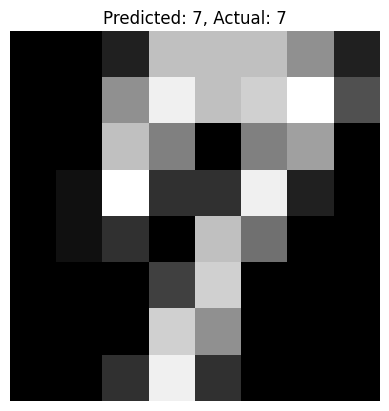

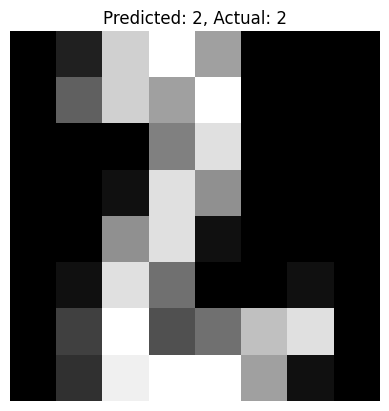

In [14]:
print("Displaying 5 prediction samples:")
for i in range(5):
    plt.imshow(X_test[i].reshape(8, 8), cmap='gray')
    plt.title(f"Predicted: {y_pred[i]}, Actual: {y_test[i]}")
    plt.axis('off')
    plt.show()